In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
os.chdir(os.path.dirname(os.getcwd()))

# Imports 

In [2]:
import math

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from tqdm import tqdm

from day_16.soln import *

In [3]:
V = set()
F = {}
D = defaultdict(lambda: 1000)

pattern = r"Valve (\w+) .*=(\d+); .* valves? (.*)"
for v, f, us in re.findall(pattern, open('day_16/small.txt').read()):
    V.add(v)
    if f != '0':
        F[v] = int(f)
    for u in us.split(', '):
        D[v,u] = 1

In [4]:
for k, i, j in itertools.product(V, V, V):
    D[i,j] = min(D[i,j], D[i,k] + D[k, j])

In [13]:
set(F) - {'BB'}

{'CC', 'DD', 'EE', 'HH', 'JJ'}

In [10]:
search(30, 'AA', F, frozenset(F), D)

ValueError: max() arg is an empty sequence

'AA' -> 'BB: 39 + 2 + ____



In [36]:
valves = read_data('data.txt')
valves

[Valve(name='RT', rate=0, paths=['EN', 'LZ'], open=False),
 Valve(name='VB', rate=0, paths=['SZ', 'BF'], open=False),
 Valve(name='AD', rate=0, paths=['EB', 'JF'], open=False),
 Valve(name='RE', rate=4, paths=['QB', 'IF', 'XT', 'WF', 'KW'], open=False),
 Valve(name='RL', rate=0, paths=['DQ', 'LZ'], open=False),
 Valve(name='OK', rate=0, paths=['QH', 'BF'], open=False),
 Valve(name='RV', rate=0, paths=['IU', 'JF'], open=False),
 Valve(name='TE', rate=0, paths=['HE', 'XF'], open=False),
 Valve(name='WW', rate=0, paths=['QH', 'YZ'], open=False),
 Valve(name='HB', rate=15, paths=['OM'], open=False),
 Valve(name='IY', rate=14, paths=['UH', 'KW', 'BN', 'LW', 'UY'], open=False),
 Valve(name='QF', rate=0, paths=['JF', 'PL'], open=False),
 Valve(name='YZ', rate=0, paths=['JG', 'WW'], open=False),
 Valve(name='QB', rate=0, paths=['SP', 'RE'], open=False),
 Valve(name='SO', rate=0, paths=['QH', 'SZ'], open=False),
 Valve(name='EB', rate=7, paths=['IF', 'NH', 'AD', 'VI', 'DQ'], open=False),
 Valve

In [38]:
start = 'AA'
g = Graph(valves, start)

In [35]:
part1(g, start)

720it [00:00, 632704.56it/s]

['BB', 'CC', 'DD', 'EE', 'HH', 'JJ'] 1568
['BB', 'CC', 'DD', 'HH', 'EE', 'JJ'] 1569
['BB', 'CC', 'DD', 'JJ', 'EE', 'HH'] 1603
['BB', 'CC', 'DD', 'JJ', 'HH', 'EE'] 1604
['BB', 'DD', 'JJ', 'EE', 'HH', 'CC'] 1629
['BB', 'DD', 'JJ', 'HH', 'EE', 'CC'] 1630
['BB', 'JJ', 'DD', 'EE', 'HH', 'CC'] 1646
['BB', 'JJ', 'DD', 'HH', 'EE', 'CC'] 1647
['DD', 'BB', 'JJ', 'EE', 'HH', 'CC'] 1650
['DD', 'BB', 'JJ', 'HH', 'EE', 'CC'] 1651
['AA', 'DD', 'BB', 'JJ', 'HH', 'EE', 'CC']
1651


1651

In [42]:
g.dist.keys()

dict_keys(['RE', 'HB', 'IY', 'EB', 'BF', 'YV', 'QH', 'AA', 'SZ', 'IU', 'XF', 'JG', 'JF', 'LZ', 'CY', 'ZB'])

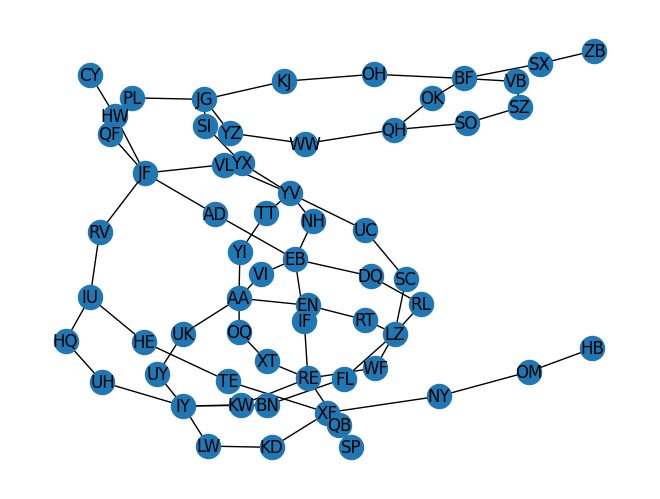

In [40]:
nx.draw(g.G, with_labels=True)